<a href="https://colab.research.google.com/github/ygeszvain/projects/blob/master/Sentiment_Analysis_Avengers_End_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
from bs4 import BeautifulSoup
import requests
import urllib.request
from urllib.request import urlopen
import re
import time

import pandas as pd #Importing the PANDAS python library
import numpy as np #importing Numpy
%matplotlib inline 

#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #initiating VADER instance

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
review=[]
for cp in np.arange(1,22):
    url = "https://www.rottentomatoes.com/m/avengers_endgame/reviews/?page=" + str(cp)
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')
    review.extend([i.text for i in soup.find_all('div', attrs={'class': 'the_review'})])
    time.sleep(3)
print ("Done!")

Done!


In [3]:
#convert output to new array, check length
content_array = np.asarray(review)
len(content_array)

420

In [0]:
#convert new array to dataframe
sentences = pd.DataFrame(content_array)

In [5]:
len(sentences)

420

In [6]:
sentences.head()

,0
0,"Afterwards, your belly will be full of superh..."
1,Is it the best superhero movie ever made? In ...
2,"An expansive story, a large and unwieldy univ..."
3,The directors have created a virtual nesting ...
4,"According to Buddhist/Taoist teachings, small..."


In [0]:
sentences.columns = ['text']

In [8]:
sentences

,text
0,"Afterwards, your belly will be full of superh..."
1,Is it the best superhero movie ever made? In ...
2,"An expansive story, a large and unwieldy univ..."
3,The directors have created a virtual nesting ...
4,"According to Buddhist/Taoist teachings, small..."
5,"Avengers: Endgame is, in every way, Loki defi..."
6,"Avengers: Endgame is a satisfying, expertly m..."
7,"One Avengers movie to bind them, and in the d..."
8,Endgame stands out as one of the most detaile...
9,There's a lot of fun to be had with this bloc...


In [0]:
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)  #Calling the polarity analyzer
    print("{:-<40} {}".format(sentence, str(snt)))

In [10]:
%time   #to calulate the time it takes the algorithm to compute a VADER score

i=0 #counter

compval1 = [ ]  #empty list to hold our computed 'compound' VADER scores


while (i<len(sentences)):

    k = analyser.polarity_scores(sentences.iloc[i]['text'])
    compval1.append(k['compound'])
    
    i = i+1
    
#converting sentiment values to numpy for easier usage

compval1 = np.array(compval1)

len(compval1)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.63 µs


420

In [0]:
sentences['VADER score'] = compval1

In [12]:
sentences.head(20)

,text,VADER score
0,"Afterwards, your belly will be full of superh...",0.4588
1,Is it the best superhero movie ever made? In ...,0.7579
2,"An expansive story, a large and unwieldy univ...",0.0000
3,The directors have created a virtual nesting ...,0.8343
4,"According to Buddhist/Taoist teachings, small...",0.4019
5,"Avengers: Endgame is, in every way, Loki defi...",0.7269
6,"Avengers: Endgame is a satisfying, expertly m...",0.7645
7,"One Avengers movie to bind them, and in the d...",-0.2500
8,Endgame stands out as one of the most detaile...,0.5070
9,There's a lot of fun to be had with this bloc...,0.8370


In [13]:
%time

#Assigning score categories and logic
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(sentences)):
    if ((sentences.iloc[i]['VADER score'] >= 0.7)):
        predicted_value.append('positive')
        i = i+1
    elif ((sentences.iloc[i]['VADER score'] > 0) & (sentences.iloc[i]['VADER score'] < 0.7)):
        predicted_value.append('neutral')
        i = i+1
    elif ((sentences.iloc[i]['VADER score'] <= 0)):
        predicted_value.append('negative')
        i = i+1

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


In [0]:
sentences['predicted sentiment'] = predicted_value

In [15]:
len(sentences['predicted sentiment'])

420

In [16]:
sentences.head(20)

,text,VADER score,predicted sentiment
0,"Afterwards, your belly will be full of superh...",0.4588,neutral
1,Is it the best superhero movie ever made? In ...,0.7579,positive
2,"An expansive story, a large and unwieldy univ...",0.0000,negative
3,The directors have created a virtual nesting ...,0.8343,positive
4,"According to Buddhist/Taoist teachings, small...",0.4019,neutral
5,"Avengers: Endgame is, in every way, Loki defi...",0.7269,positive
6,"Avengers: Endgame is a satisfying, expertly m...",0.7645,positive
7,"One Avengers movie to bind them, and in the d...",-0.2500,negative
8,Endgame stands out as one of the most detaile...,0.5070,neutral
9,There's a lot of fun to be had with this bloc...,0.8370,positive


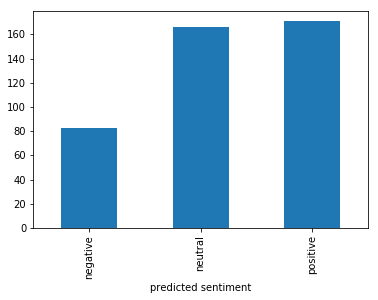

In [17]:
sentences.groupby('predicted sentiment').size().plot(kind='bar')

In [0]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 

In [0]:
df = sentences[sentences['predicted sentiment']=='negative']

words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

stopwords = set(STOPWORDS)
stopwords.add("amp")
stopwords.add("flight")
stopwords.add("united")
stopwords.add("plane")
stopwords.add("now")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

In [20]:
type(cleaned_word)

str

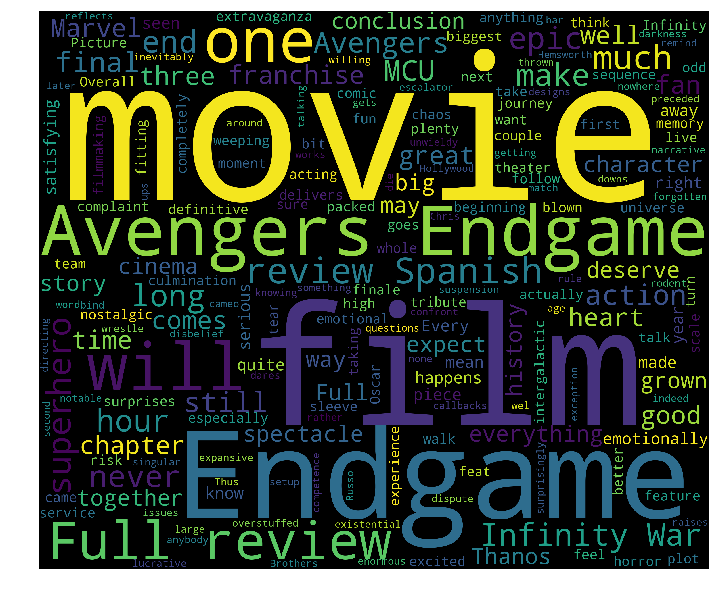

In [21]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
df = sentences[sentences['predicted sentiment']=='positive']

words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                                and word !='&amp'
                            ])

stopwords = set(STOPWORDS)
stopwords.add("amp")
stopwords.add("flight")
stopwords.add("flights")
stopwords.add("united")
stopwords.add("plane")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

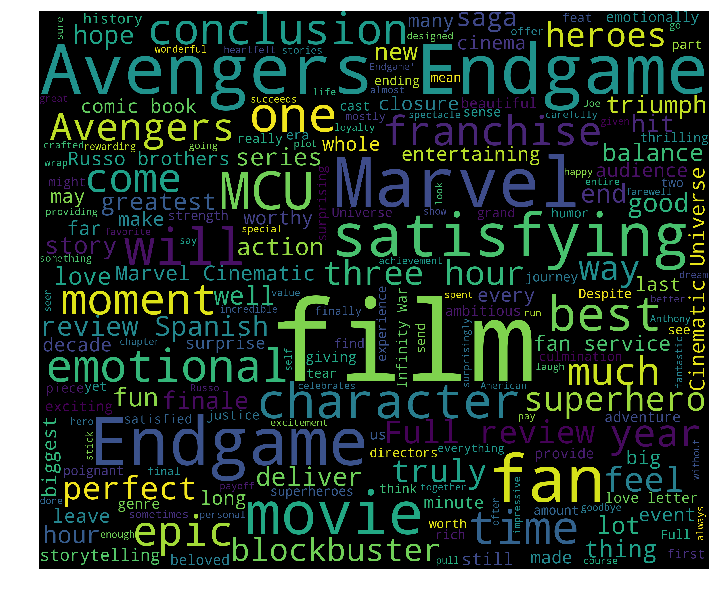

In [23]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()